# Test of the field interpolation functions
- get the interpolated field vector at a given (time, lon, lat) point

#### Imports

In [1]:
import sys
import os

import cartopy.crs as ccrs
import cartopy.feature as cfeature

import scipy
import scipy.signal

import numpy as np
import xarray as xr

sys.path.append(os.path.abspath(os.path.join('..', 'common_utils')))
import utils

%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt

## Data and utils

#### field data

In [5]:
# L3 field data
path_fields = '../save_data/fields_data'
ds_swot = xr.open_dataset(os.path.join(path_fields, 'field_L3SWOT.nc'))

ds_swot  = utils.add_Tgrid_velocities(ds_swot,  replace=True)

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


In [ ]:
# test with 4 points

lat = [40, 40.2, 40.4, 40.6]
lon = [4.9]*len(lat)
time = np.array(['2023-04-03T23:25:18.000000000']*len(lat), dtype='datetime64[ns]' )

## Closest interpolation

#### test : plot geostrophic currents interpolated

In [6]:
u, v = utils.interp_closest_velocity_field_L3(ds_swot, u='u_geos', v='v_geos', time_vec=time, lat_vec=lat, lon_vec=lon)

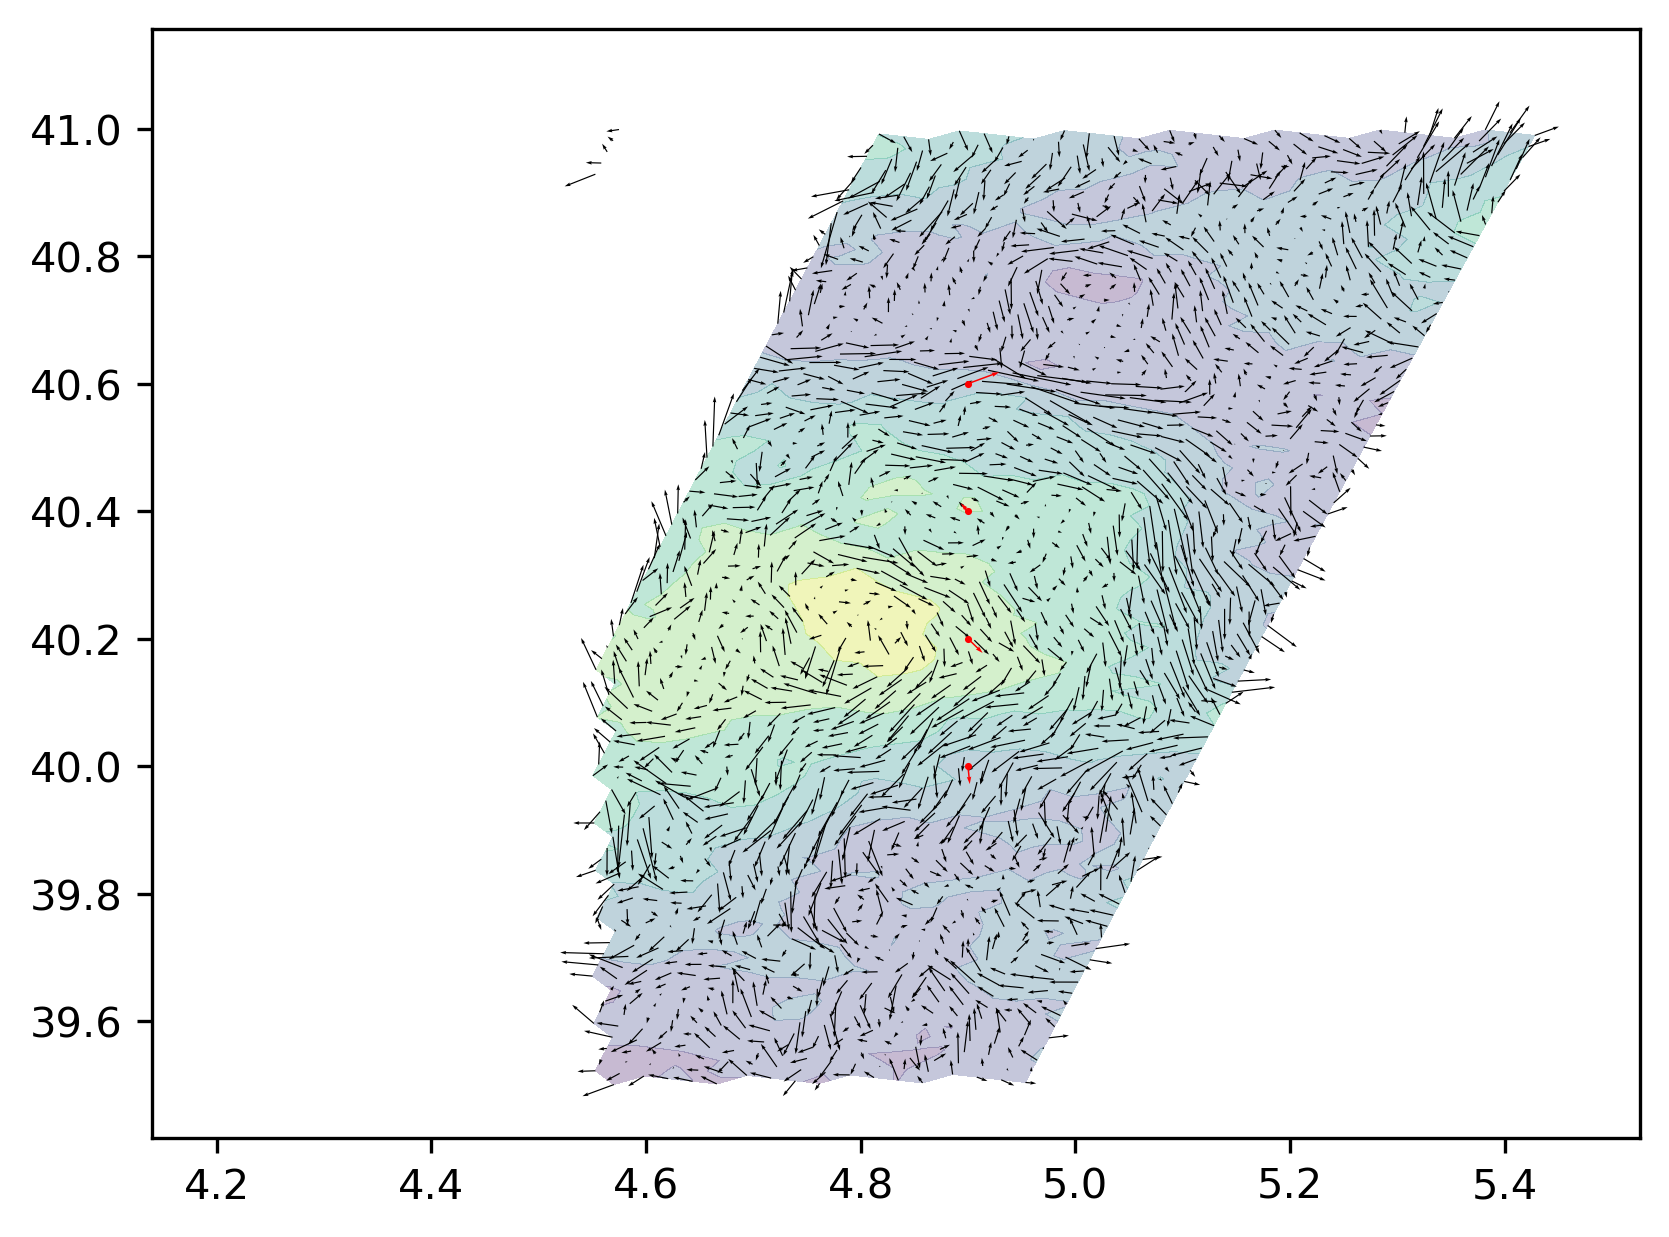

In [7]:
matplotlib.rcParams['figure.dpi'] = 300

ds = ds_swot.isel(time=4)

bbox= [4.55, 5.5, 39.5, 41]
ds = utils.restrain_domain(ds, *bbox)

plt.contourf(ds.longitude, ds.latitude, ds.ssh, cmap='viridis', alpha=0.3)
plt.quiver(ds.longitude, ds.latitude, ds.u_geos, ds.v_geos, scale=20, width=0.0008)

plt.scatter(lon, lat, c='r', s=0.5)
plt.quiver(lon, lat, u, v, scale=20, width=0.001, color='red')

## Linear interpolation

In [8]:
u, v = utils.interp_linear_velocity_field_L3(ds_swot, u='u_geos', v='v_geos', time_vec=time, lat_vec=lat, lon_vec=lon)

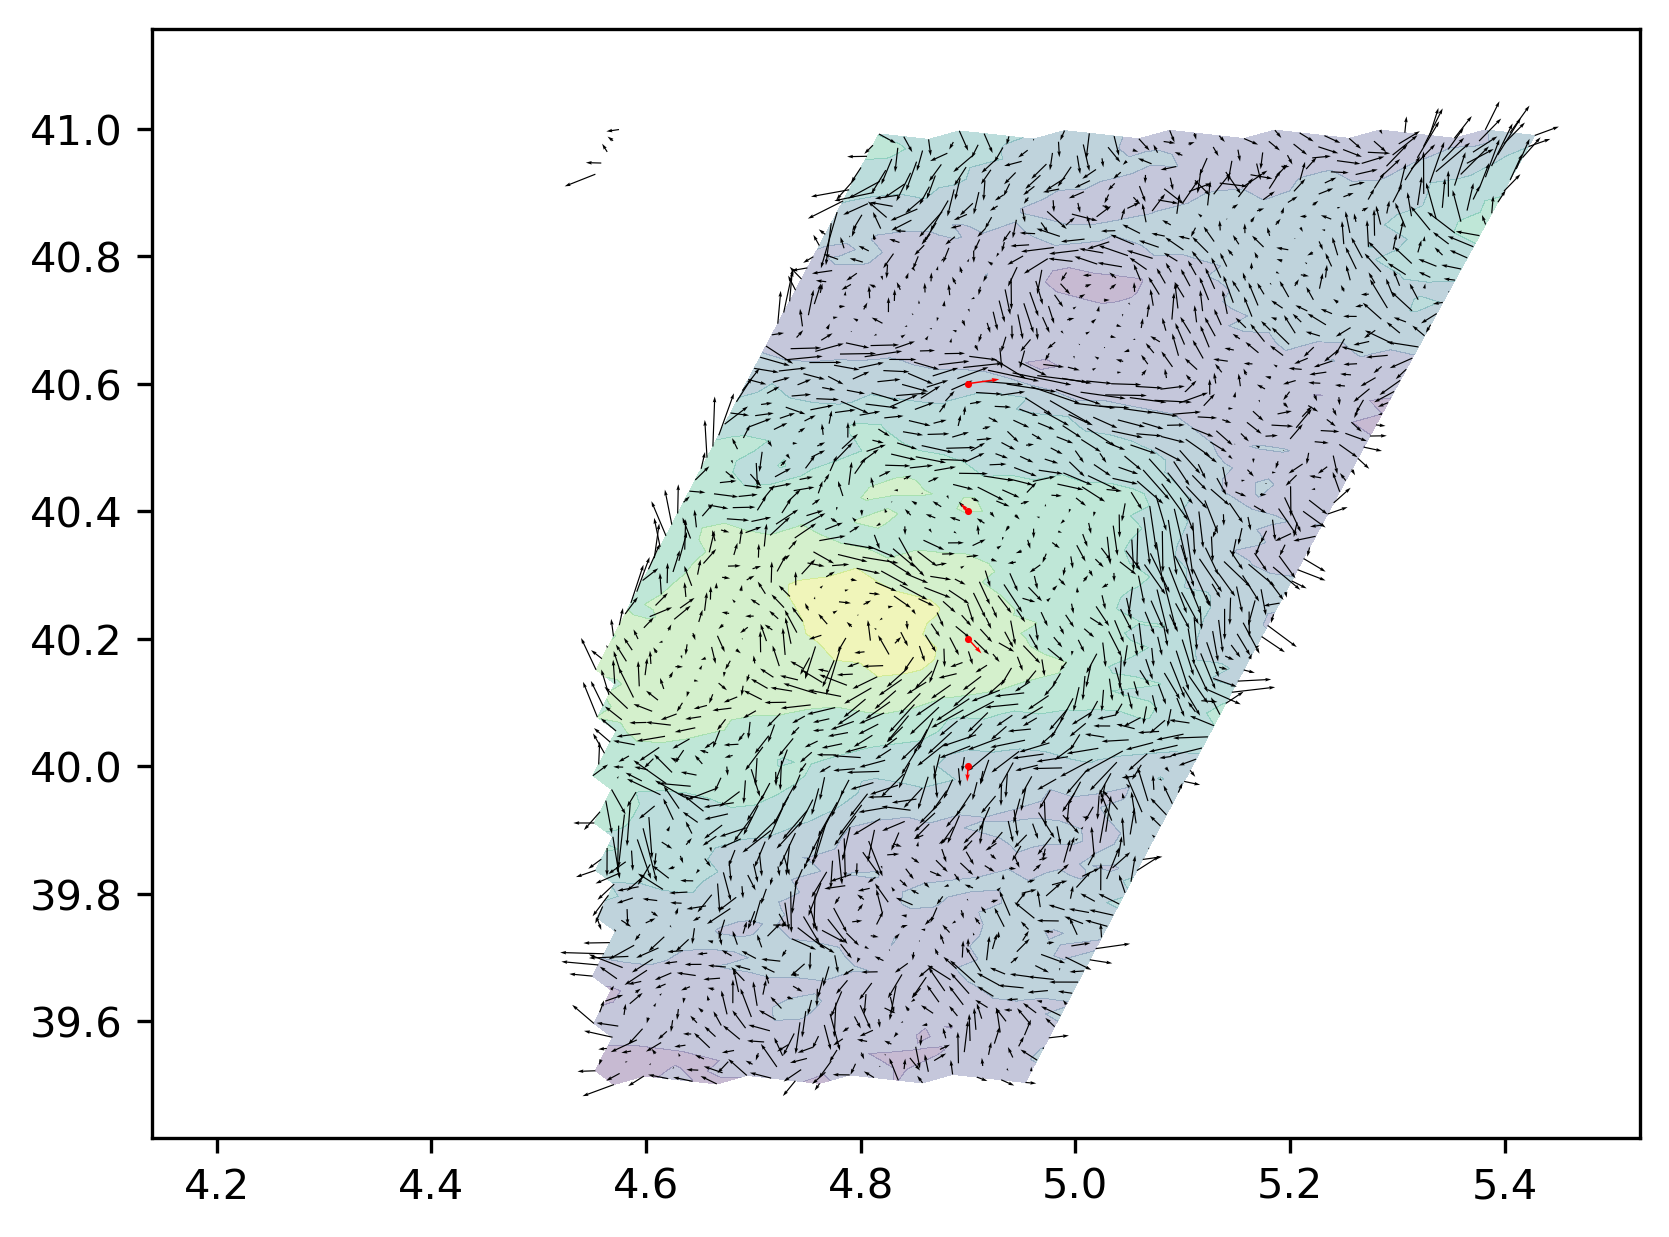

In [9]:
matplotlib.rcParams['figure.dpi'] = 300


ds = ds_swot.isel(time=4)

bbox= [4.55, 5.5, 39.5, 41]
ds = utils.restrain_domain(ds, *bbox)

plt.contourf(ds.longitude, ds.latitude, ds.ssh, cmap='viridis', alpha=0.3)
plt.quiver(ds.longitude, ds.latitude, ds.u_geos, ds.v_geos, scale=20, width=0.0008)

plt.scatter(lon, lat, c='r', s=0.5)
plt.quiver(lon, lat, u, v, scale=20, width=0.001, color='red')